In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt


from TinyNN.NN.MLP import  MLP
from TinyNN.NN.Layer import  Layer
from TinyNN.NN.Value import  Value
from TinyNN.Activations.activation import Linear, Relu, Tanh, Sigmoid, Exp
from TinyNN.Training.loss import loss, max_margin_loss
from TinyNN.Training.train import train

from sklearn.datasets import make_moons, make_blobs

np.random.seed(48)
random.seed(48)

## Classification 

In this section, we run throuh a simple example where we train the NN on a basic classification problem

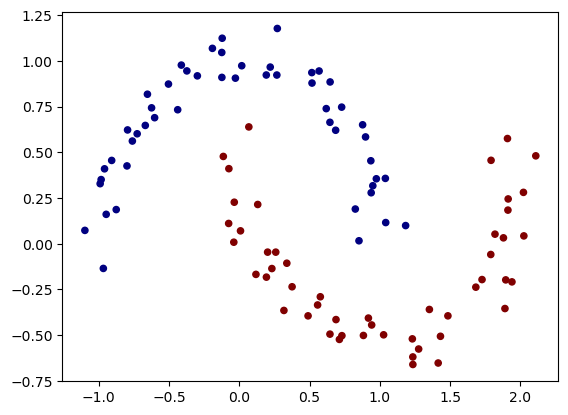

In [2]:
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1

plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
plt.show()

In [3]:
model = MLP() # 2-layer neural network
model.add(Layer(2, 16, activation = Tanh()))
model.add(Layer(16, 16, activation = Tanh()))
model.add(Layer(16, 1, activation = Linear()))

In [4]:
# train(model, max_margin_loss, X, y, n_batches = 5)

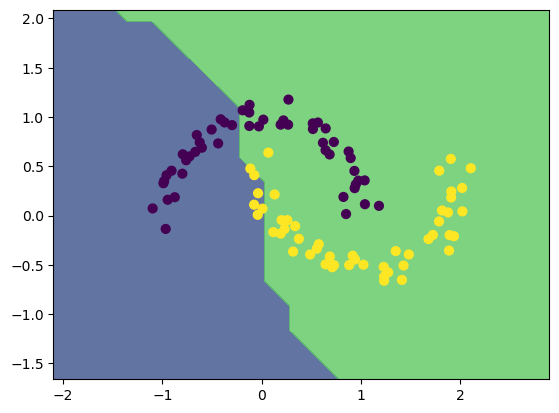

In [5]:
# visualize decision boundary
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

The NN seems to be doing a good job of classifying the points! 

## Regression

We will now use the NN to train for a regression problem. We will fit a cubic with Gaussian Noise

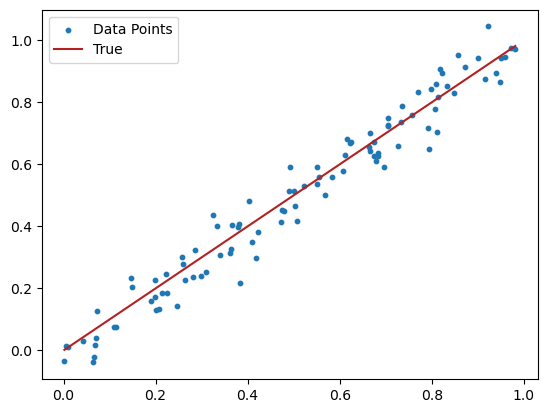

In [199]:
X = np.random.random_sample(size=100) 
X = np.sort(X)

y_true = X
y = y_true +np.random.normal(loc=0.0, scale=0.05, size=100)

plt.scatter(X, y, s = 10, label = 'Data Points')
plt.plot(X, y_true, color = 'firebrick', label = 'True')
plt.legend()
plt.show()

In [200]:
def mean_square_error(y, yhat):
    return (1/len(y))*sum(((yi-yhi)**2 for yi, yhi in zip(y, yhat)))

In [201]:
def train(model, loss_func, X, y, epochs = 50, n_batches = 1, alpha = 1e-4, lr = 0.1):
    batch_size = len(X) // n_batches
    for k in range(epochs):
        for b in range(n_batches):
            total_loss = loss(model, loss_func,X[b*batch_size:(b+1)*batch_size],y[b*batch_size:(b+1)*batch_size], alpha = alpha)
        
            model.zero_grad()
            total_loss.backward()
            
            learning_rate = (lr/n_batches)*(1.0 - 0.9*k/100)
            for p in model.parameters():
                # print(p)
                p.data -= learning_rate * p.grad
                
        if k % 1 == 0:
            print(f"Epoch {k}, loss {np.round(total_loss.data,4)}")

In [211]:
model = MLP() 
model.add(Layer(1, 2, activation = Linear()))
model.add(Layer(2, 1, activation = Linear()))

train(model, mean_square_error, [[Xi] for Xi in X], y, epochs = 100, n_batches = 5, lr = 0.5, alpha = 0.005)
# model([1])


Epoch 0, loss 0.071
Epoch 1, loss 0.0303
Epoch 2, loss 0.0241
Epoch 3, loss 0.0204
Epoch 4, loss 0.0174
Epoch 5, loss 0.0149
Epoch 6, loss 0.0129
Epoch 7, loss 0.0112
Epoch 8, loss 0.0098
Epoch 9, loss 0.0086
Epoch 10, loss 0.0077
Epoch 11, loss 0.007
Epoch 12, loss 0.0064
Epoch 13, loss 0.0059
Epoch 14, loss 0.0055
Epoch 15, loss 0.0052
Epoch 16, loss 0.0049
Epoch 17, loss 0.0047
Epoch 18, loss 0.0045
Epoch 19, loss 0.0044
Epoch 20, loss 0.0043
Epoch 21, loss 0.0042
Epoch 22, loss 0.0041
Epoch 23, loss 0.004
Epoch 24, loss 0.004
Epoch 25, loss 0.0039
Epoch 26, loss 0.0039
Epoch 27, loss 0.0039
Epoch 28, loss 0.0038
Epoch 29, loss 0.0038
Epoch 30, loss 0.0038
Epoch 31, loss 0.0038
Epoch 32, loss 0.0038
Epoch 33, loss 0.0037
Epoch 34, loss 0.0037
Epoch 35, loss 0.0037
Epoch 36, loss 0.0037
Epoch 37, loss 0.0037
Epoch 38, loss 0.0037
Epoch 39, loss 0.0037
Epoch 40, loss 0.0037
Epoch 41, loss 0.0037
Epoch 42, loss 0.0037
Epoch 43, loss 0.0037
Epoch 44, loss 0.0037
Epoch 45, loss 0.0036
Ep

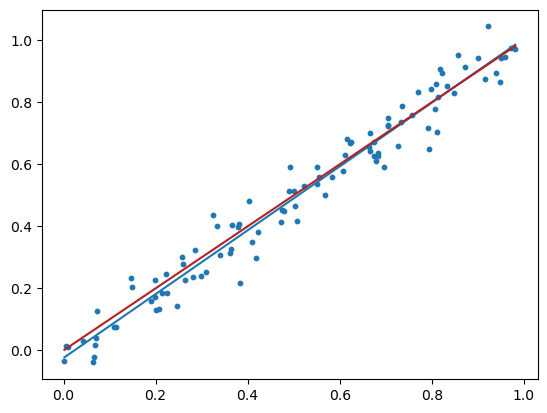

In [212]:
plt.plot(X, [v.data for v in model.forwards([[Xi] for Xi in X])], label = 'True')
plt.plot(X, y_true, color = 'firebrick', label = 'True')
plt.scatter(X, y, s = 10, label = "Data Points")
plt.show()


So we have got it to train on a straight line, however getting it to fit a polynomial is proving quite hard. 